In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from src.layers.flow import get_mask, MaskedLinear

In [10]:
in_dim = 4
hidden_dim = 6
out_dim = in_dim * 2
flow_dim = in_dim

x = torch.randn(1, 3)

# input -> hidden
in_degrees = torch.arange(in_dim) % flow_dim
out_degrees = torch.arange(hidden_dim) % (flow_dim - 1)
print(in_degrees)
print(out_degrees)
print((out_degrees.unsqueeze(-1) >= in_degrees.unsqueeze(0)).float().T)

# hidden -> out
in_degrees = torch.arange(hidden_dim) % (flow_dim - 1)
out_degrees = torch.arange(out_dim) % flow_dim - 1
print(in_degrees)
print(out_degrees)
print((out_degrees.unsqueeze(-1) >= in_degrees.unsqueeze(0)).float().T)

tensor([0, 1, 2, 3])
tensor([0, 1, 2, 0, 1, 2])
tensor([[1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([0, 1, 2, 0, 1, 2])
tensor([-1,  0,  1,  2, -1,  0,  1,  2])
tensor([[0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 0., 0., 1.]])


In [48]:
m = MaskedLinear(4, 4,mask, bias=False)
m.linear.weight.T

tensor([[ 0.2103,  0.3630,  0.0170, -0.1751],
        [-0.0303,  0.4507,  0.0473,  0.0959],
        [-0.4481, -0.3461,  0.1061,  0.1120],
        [-0.1644,  0.2748, -0.1328,  0.3936]], grad_fn=<PermuteBackward0>)

In [49]:
x = torch.randn(1, 4)
print(x)
print((m.linear.weight * mask).T)
# print(torch.nn.functional.linear(x, m.linear.weight))
# print(torch.matmul(x, m.linear.weight.T))
print(torch.matmul(x, (m.linear.weight * mask).T))


tensor([[-1.3728, -1.1683,  1.1246, -0.6011]])
tensor([[ 0.2103,  0.3630,  0.0170, -0.1751],
        [-0.0000,  0.0000,  0.0000,  0.0000],
        [-0.4481, -0.3461,  0.1061,  0.1120],
        [-0.0000,  0.0000, -0.0000,  0.0000]], grad_fn=<PermuteBackward0>)
tensor([[-0.7926, -0.8876,  0.0960,  0.3663]], grad_fn=<MmBackward0>)


In [5]:
import torch
a = torch.randn(32, 24, 4)
(a - a.min(dim=0).values.min(dim=0).values).shape

torch.Size([32, 24, 4])

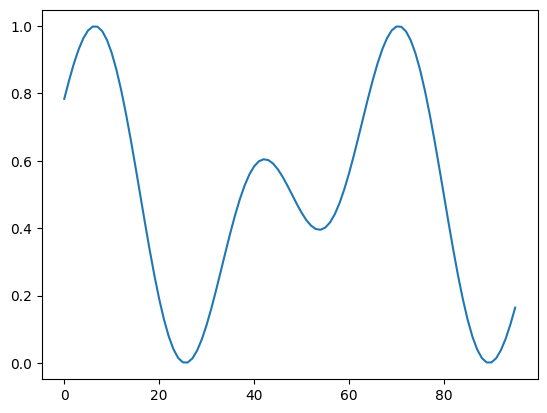

In [9]:
import torch
import matplotlib.pyplot as plt

t = torch.linspace(0, 64 * torch.pi, 1024*2).float()
data = torch.cos(t) +  torch.sin(2 * t)
data = (data - data.min()) / (data.max() - data.min())
# data = data.reshape(-1, 1)
plt.plot(data[:96])